In [116]:
# 4.2.1
import numpy as np

In [117]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [118]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [119]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

In [120]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [121]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [122]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

In [123]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [124]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [125]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [126]:
train_size = x_train.shape[0]
batch_size = 100
batch_mask = np.random.choice(train_size, batch_size)
# print(batch_mask)
x_batch = x_train[batch_mask]
# print(x_batch[0])
t_batch = t_train[batch_mask]

In [127]:
np.

In [128]:
# row가 1개만 있을 경우, 한 번 더 감싸줌
y1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y1.reshape(1, y1.size)

y2 = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]] )
y2.ndim

# reshape을 해준 다음에는 모든 경우(= row가 1였어도)에 대해서 [0]이 row의 갯수를 가짐
print(y1.shape)
print(y1.reshape(1, y1.size).shape)
print(y2.shape)

print(y1)
print(y1.reshape(1, y1.size))
print(y2)


(10,)
(1, 10)
(3, 10)
[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5  6  7  8  9 10]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]


In [129]:
def cross_entropy_error_without_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0] # row의 갯수

    return -np.sum(np.log(y[np.arange(batch_size), t]))

In [130]:
# 4.3.1
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [131]:
# 4.3.2
def function_1(x):
    return 0.01*x**2 + 0.1*x

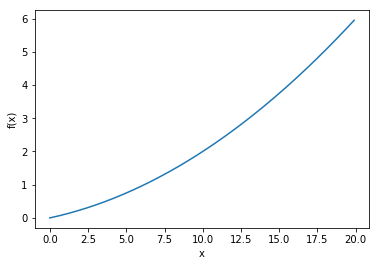

In [132]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [133]:
h1 = numerical_diff(function_1, 5)
print(h1)

0.1999999999990898


In [134]:
h2 = numerical_diff(function_1, 10)
print(h2)

0.2999999999986347


In [135]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


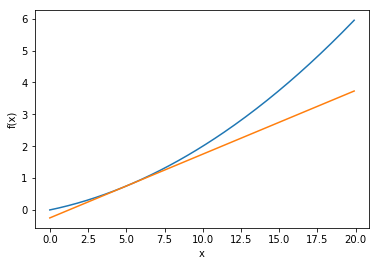

In [136]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


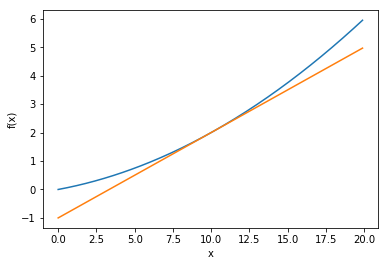

In [137]:
tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [138]:
# 4.3.3
def function_2(x):
    return x[0]**2 + x[1]**2
#     return np.sum(x**2)

In [139]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [140]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [141]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [142]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [143]:
# 4.4
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열이 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [144]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [145]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [146]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

In [147]:
# 4.4.1
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [148]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [155]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [157]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [160]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.01, step_num=100)

array([-0.39785867,  0.53047822])

In [166]:
# 4.4.2
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [168]:
net = simpleNet()
print(net.W)

[[-1.69414616  0.27664649 -0.32290314]
 [ 0.76168039  0.56703593  0.01551011]]


In [170]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.33097535  0.67632023 -0.17978278]


In [172]:
np.argmax(p)

1

In [174]:
t = np.array([0, 0, 1])
net.loss(x,t)

1.4383296186734087

In [176]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.58222661096036099

In [178]:
def f(W):
    return net.loss(x, t)

In [180]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.12241384 -0.26480815  0.14239431]
 [ 0.18362077 -0.39721223  0.21359146]]
